# Introduction

The National UFO Reporting Center (NUFORC) has been in operation since 1974. In their own words, "The Center’s primary function over the past five decades has been to receive, record, and to the greatest degree possible, corroborate and document reports from individuals who have been witness to unusual, possibly UFO-related events". They make no claims as to the validity of the information in any of these reports.  They have omitted any of the obvious hoaxes, however most reports have been posted exactly as received in the author’s own words. Their full database contains over 147,000 entries, but we chose a more concise version.

For our project we chose a dataset of recorded UFO sightings. We found this dataset at https://corgis-edu.github.io/corgis/python/ufo_sightings/. However, the data for the set comes from the  (https://nuforc.org/). The data was taken from the the NUFORC, was cleaned and uplaoed to GitHub by Sigmonf Axel. The dataset contains over 80,000 entries from around the world.

We chose this dataset because we are intrigued by UFOs and how we can interact with them. We had questions such as Where are we most likely to see a UFO? Where are we most likely to see a _____ shaped UFO? Where are we most likely to have our longest encounter? What if we want our encounter to be at a certain time of day? If we go to a certain place, what is the most likely shape of a UFO? 

# Materials

Our dataset consists of 11 columns, and 80,332 entries. The attriubtes are: date_time, city_area, state, country, ufo_shape, encounter_length, described_encounter_length, description, date_documented, latitude, and longitude. Most of these are self explanatory, but some could use fome further explanation. 

- "date_time" is the day, month, year, and time of day that the encounter happened, but "date_documented" is the date that the encounter was reproted to the NUFORC. The difference between these ranges from 0 days to many years. 
    
- "described_encounter_length" is the length of the encounter as reported by the party reporting it. Often this contains text, such as "30 seconds", or "1-2 hours". "encounter_length" takes the value from the described encounter length and converts it to seconds. In cases where a time range is given, the ceiling of that range is taken for the encounter_length".

Our data was already very clean when we started. Many of the "important" attributes have very few missing values. Importance is relative in this case. While there are lots of missing values in the "country" column, there is only 1 missing value in the "latitude" and "longitude" columns. Since latitude and longitude can be used to find the exact location of the encounter, they are more important than the "city_area", "state", and "country" attributes which means we can worry less about those missing values.

# Methods

This is where we talk about our methods

The first algorithm that we ran was a k-means algorithm. We wanted to group the encounters based off of their location (latitude and longitude). We first did this on the entire set, and then we focused on North America. We chose k-means due to the size of our dataset as k-means is linear; it is relatively scalable. K-means is also a simpler clustering algorithm and was not very difficult to implement. ALSO EXPLAIN THE ALGORITHM

We also tried to make a classifier model for the dataset. The goal was the be able to guess the shape of a UFO based off of its latitude and longitude. We used a RandomForestClassifier for this. EXPLAIN WHAT THAT IS. EXPLAIN WHY WE PICKED IT.


# Results

In [1]:
import pandas as pd
ufos = pd.read_csv("ufo_sightings.csv");

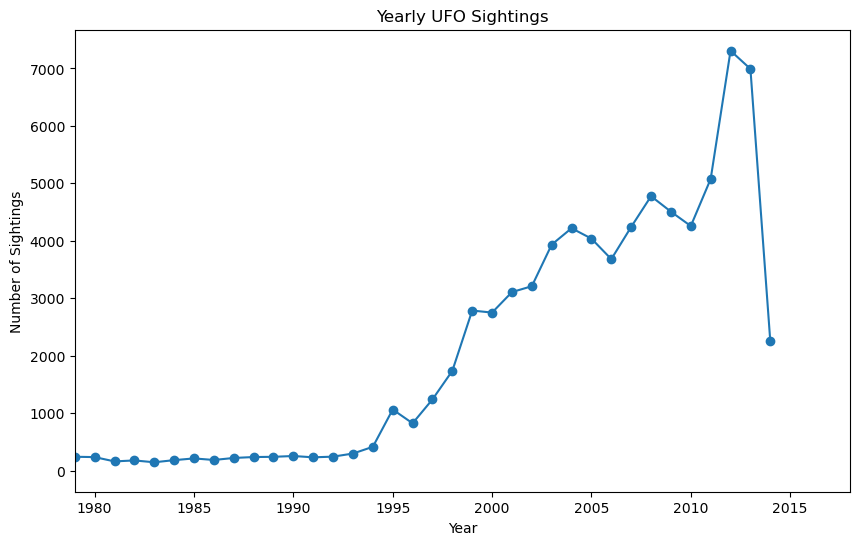

In [2]:
import matplotlib.pyplot as plt
ufos['date_time'] = pd.to_datetime(ufos['date_time'], errors='coerce')
#ufos['date_time'] = ufos['date_time'].str.replace('24:00', '00:00')


# Drop rows with invalid datetime values
ufos = ufos.dropna(subset=['date_time'])

ufos['day'] = ufos['date_time'].dt.day
#ufos['month'] = ufos['date_time'].dt.month
ufos['year'] = ufos['date_time'].dt.year

yearly_counts = ufos.groupby('year').size()


plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', marker='o', xlabel='Year', ylabel='Number of Sightings', title='Yearly UFO Sightings')

# Set the x-axis limits
plt.xlim(1979, 2018)

plt.show()

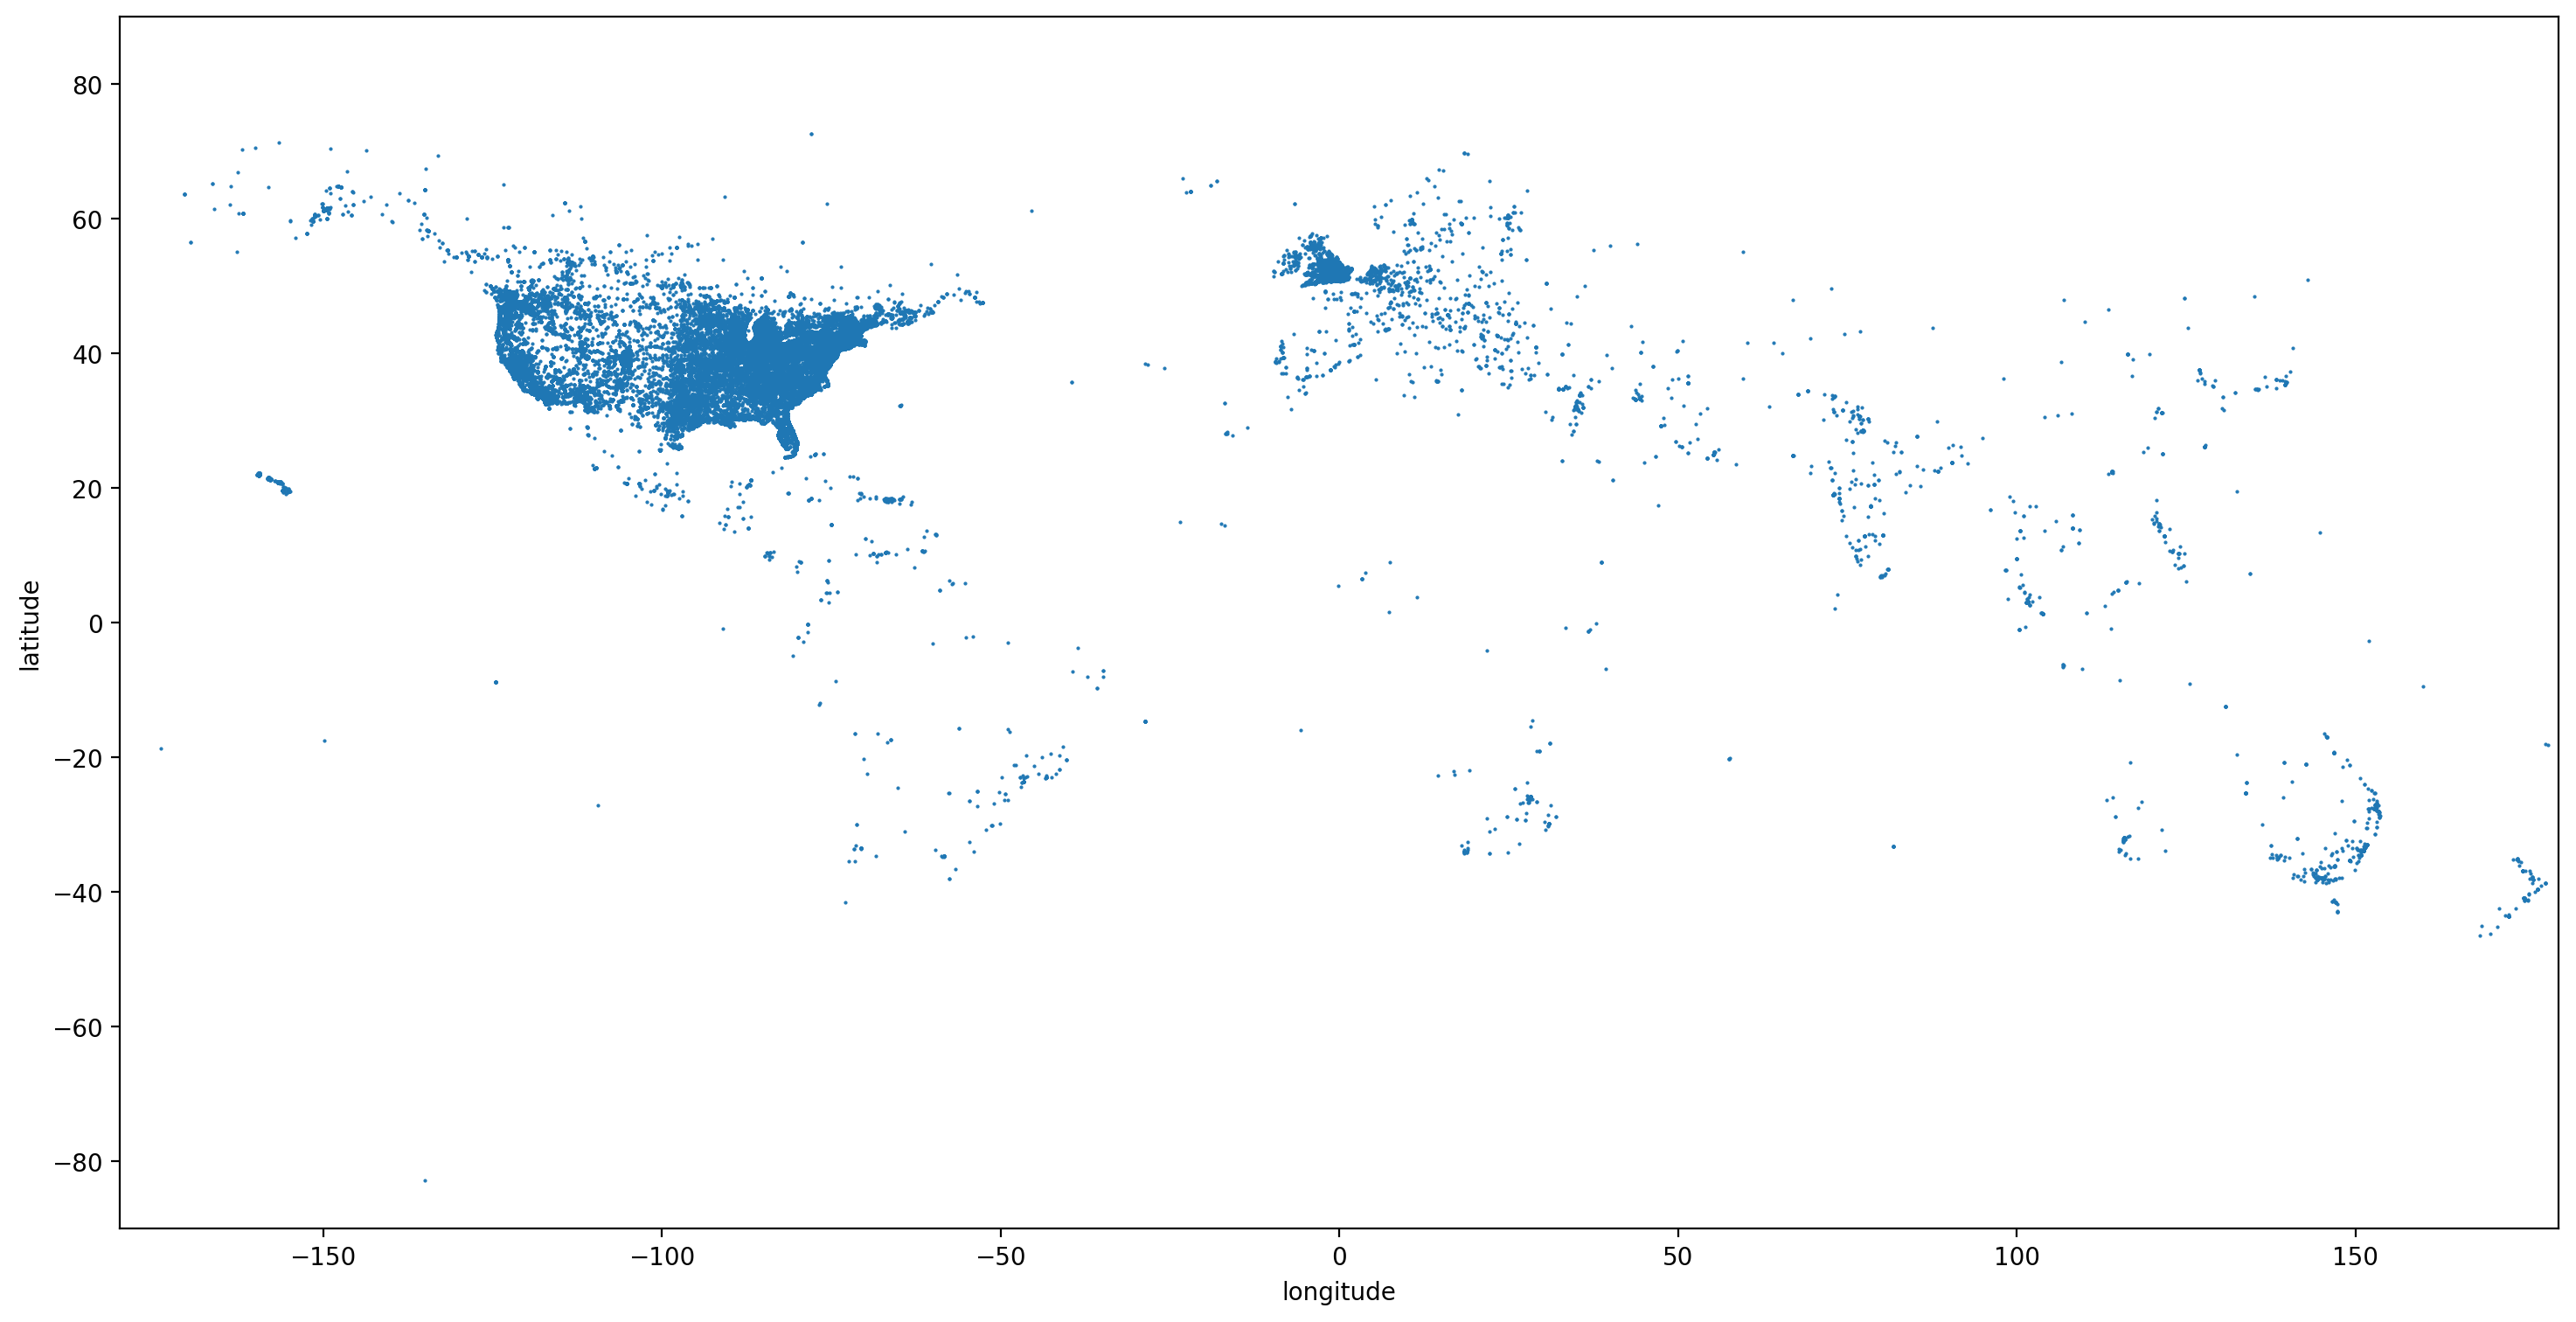

In [3]:
xpoints = ufos['longitude']
ypoints = ufos['latitude']
fig = plt.figure(figsize=(18,9),dpi=200)
plt.scatter(xpoints, ypoints, 0.25)
plt.axis([-180,180,-90, 90])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

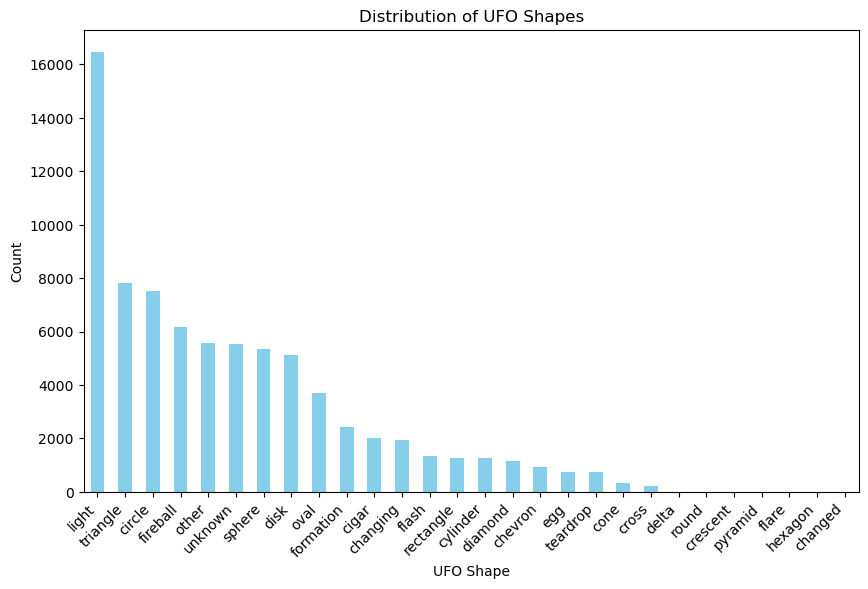

In [4]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
ufo_shapes = ufos['ufo_shape']

# Plot the distribution of UFO shapes
plt.figure(figsize=(10, 6))
ufo_shapes.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of UFO Shapes')
plt.xlabel('UFO Shape')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [5]:
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


ufo2 = ufos[['encounter_length','ufo_shape']].dropna()
le = preprocessing.LabelEncoder()
for column_name in ufo2.columns:
    if ufo2[column_name].dtype == object:
        ufo2[column_name] = le.fit_transform(ufo2[column_name])
    else:
        pass
ufo2


train_data = ufo2.loc[:60246]
test_data = pd.DataFrame(data=ufo2.loc[60247:].to_numpy(),columns=ufo2.columns)
X = train_data.drop(['ufo_shape'],axis=1)
Y = train_data['ufo_shape']

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
testX = test_data.drop(['ufo_shape'],axis=1)
testY = test_data['ufo_shape']
predY = clf.predict(testX)

from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))


Accuracy on test data is 0.22


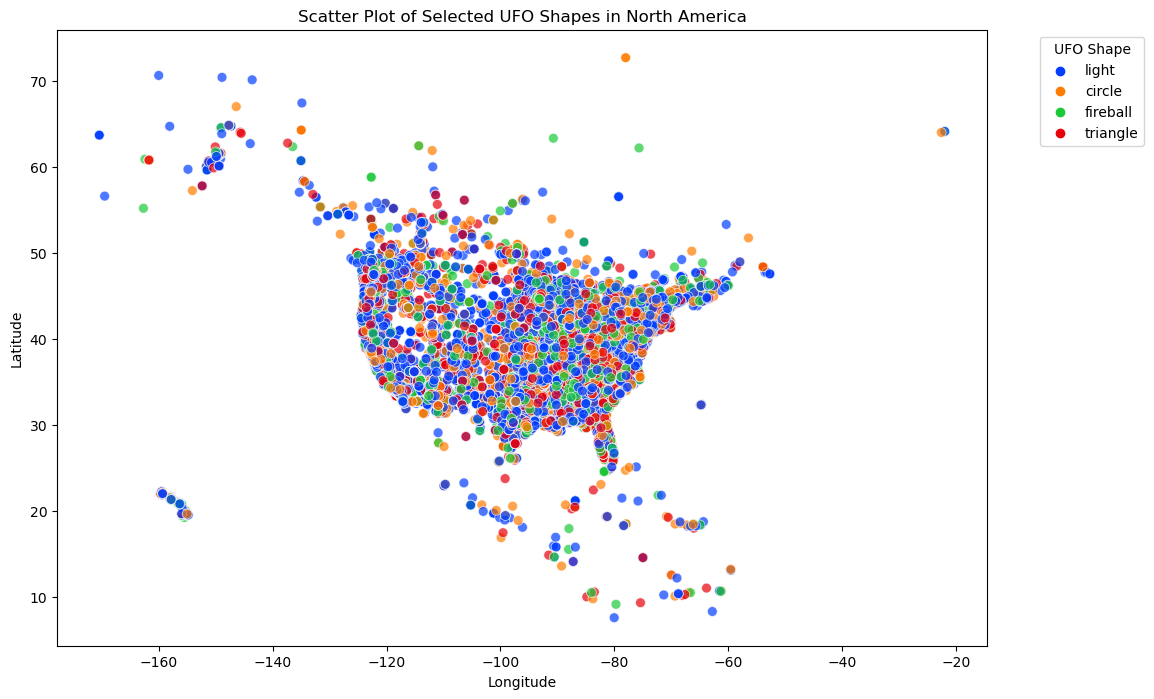

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the latitude and longitude range
latitude_range = (7, 85)
longitude_range = (-179, -20)

# Select only specific UFO shapes within the specified range
selected_shapes = ['light', 'triangle', 'circle', 'fireball']
selected_ufos = ufos[(ufos['ufo_shape'].isin(selected_shapes)) & 
                     (ufos['latitude'].between(latitude_range[0], latitude_range[1])) & 
                     (ufos['longitude'].between(longitude_range[0], longitude_range[1]))]

# Set the style and create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='ufo_shape', data=selected_ufos, palette='bright', s=50, alpha=0.7)

plt.title('Scatter Plot of Selected UFO Shapes in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='UFO Shape', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


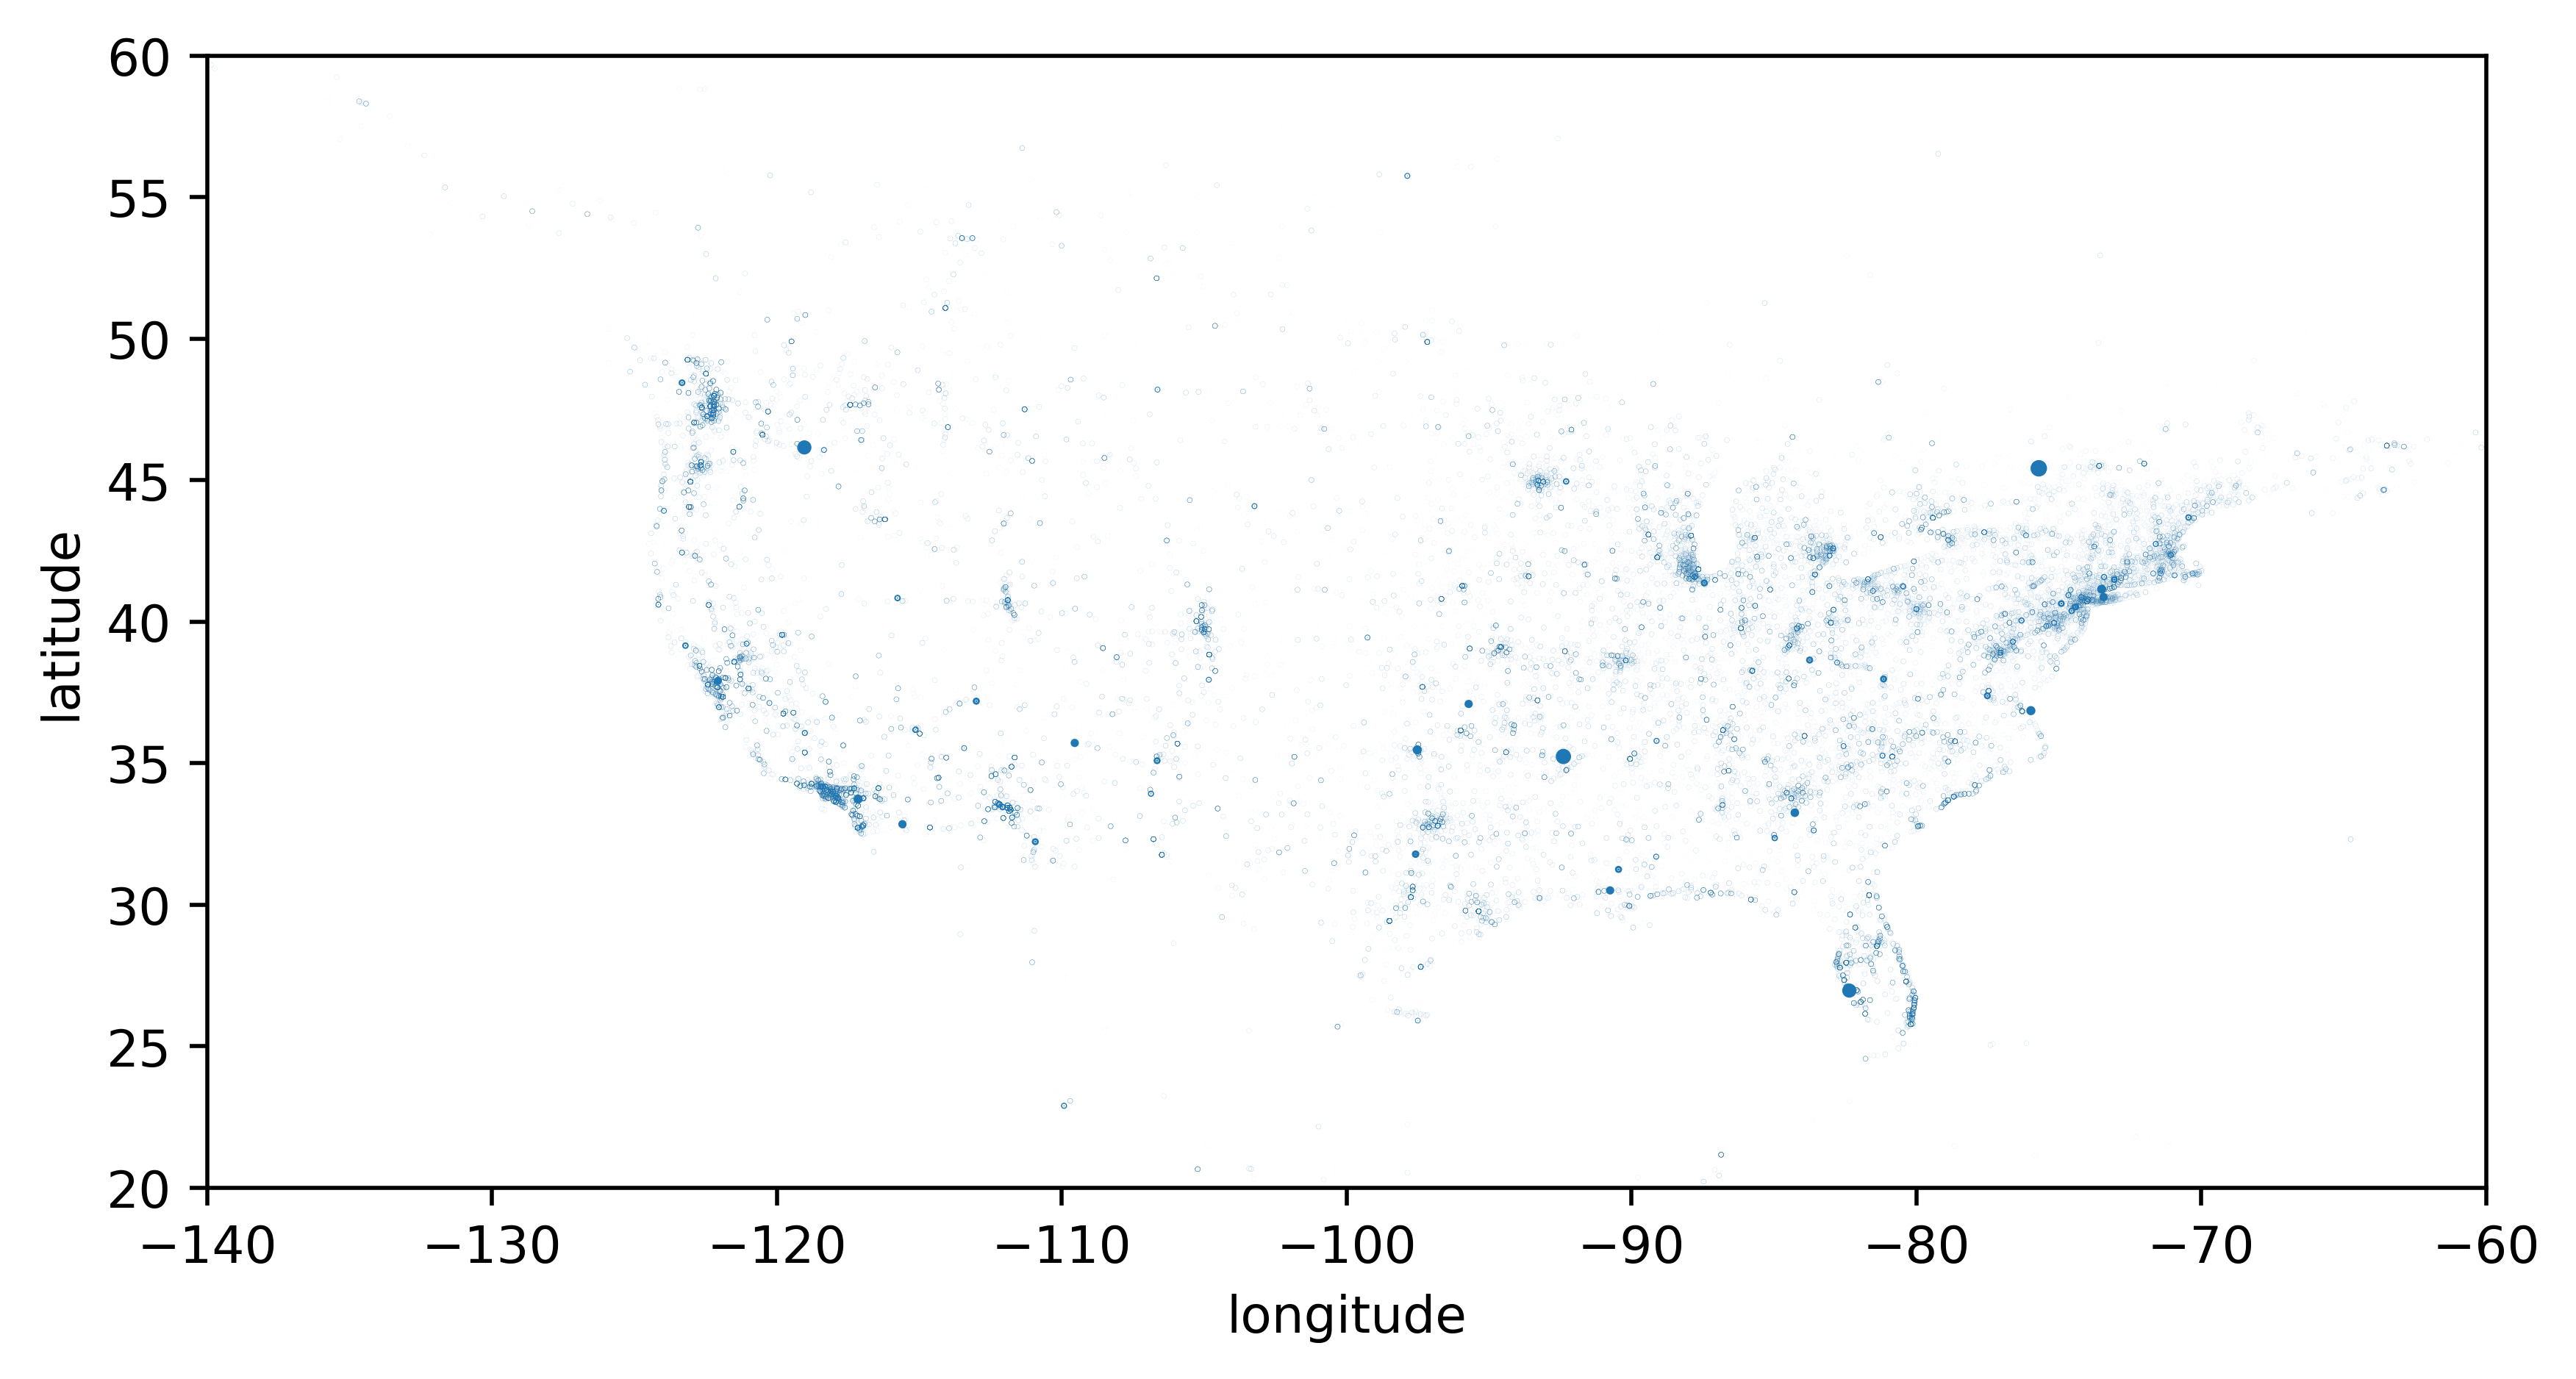

In [7]:
xpoints = ufos['longitude']
ypoints = ufos['latitude']
sizes = preprocessing.normalize([ufos['encounter_length'].fillna(0)])
fig = plt.figure(figsize=(8,4),dpi=500)
plt.scatter(xpoints, ypoints, sizes*10)
plt.axis([-140,-60,20, 60])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

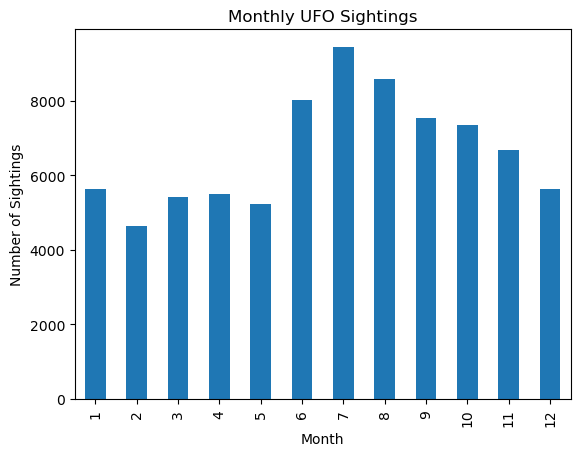

In [8]:
import matplotlib.pyplot as plt

# defined 
ufos['month'] = ufos['date_time'].dt.month
monthly_counts = ufos.groupby('month').size()
monthly_counts.plot(kind='bar', xlabel='Month', ylabel='Number of Sightings', title='Monthly UFO Sightings')
plt.show()

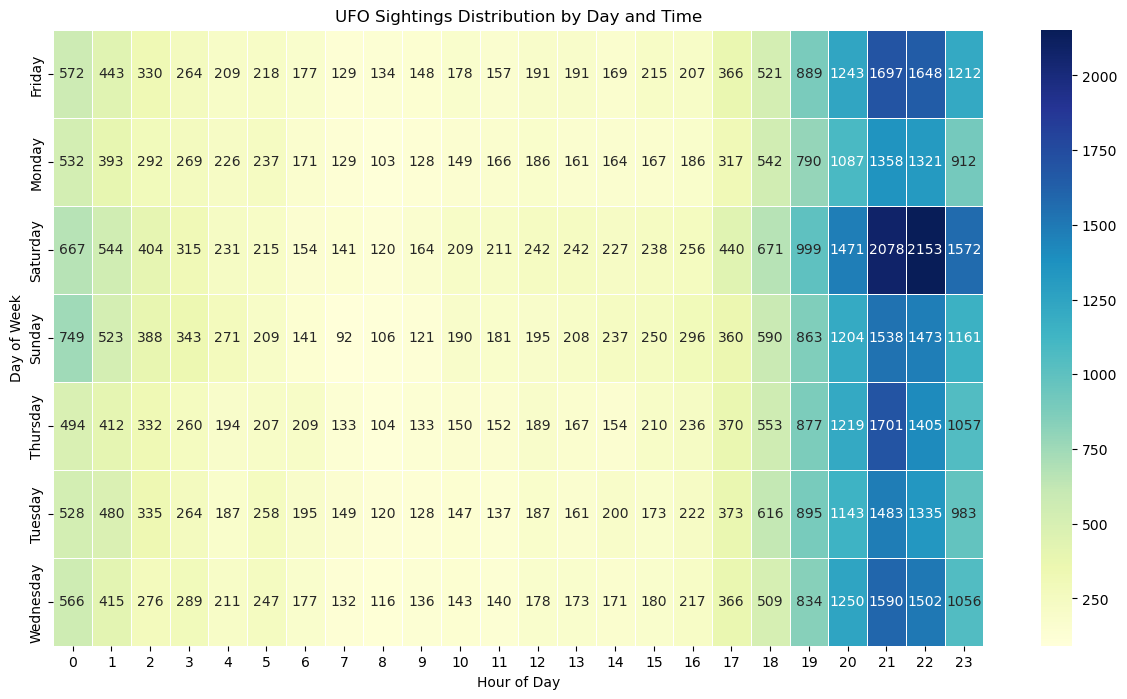

In [9]:
import seaborn as sns

# Assuming 'date_time' is in datetime format
ufos['date_time'] = pd.to_datetime(ufos['date_time'])

# Extract day and hour information
ufos['day'] = ufos['date_time'].dt.day_name()
ufos['hour'] = ufos['date_time'].dt.hour

# Create a pivot table for the heatmap
heatmap_data = ufos.pivot_table(index='day', columns='hour', aggfunc='size', fill_value=0)

# Set up the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)

plt.title('UFO Sightings Distribution by Day and Time')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

plt.show()


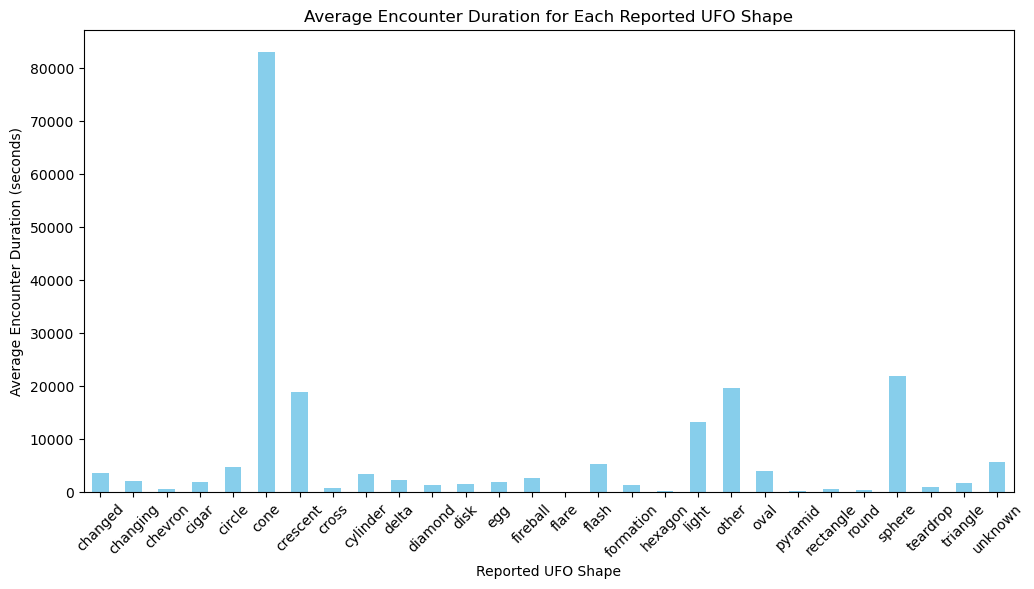

In [10]:
shape_grouped = ufos.groupby('ufo_shape')['encounter_length'].mean()
#print(shape_grouped)
plt.figure(figsize=(12, 6))
shape_grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Reported UFO Shape')
plt.ylabel('Average Encounter Duration (seconds)')
plt.title('Average Encounter Duration for Each Reported UFO Shape')
plt.xticks(rotation=45)
plt.show()

# Conclusion

This is where we put the conclusion